In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

import numpy as np
import pandas as pd
import pandas_datareader as pdr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

In [3]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359


In [4]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24809.279297,23956.478516,23984.750000,24147.816406,36869427200,24147.816406


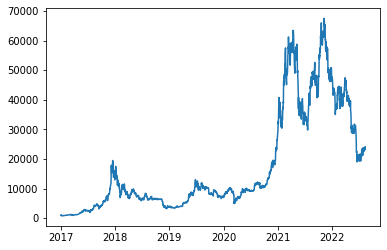

In [5]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049 entries, 2017-01-01 to 2022-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2049 non-null   float64
 1   Low        2049 non-null   float64
 2   Open       2049 non-null   float64
 3   Close      2049 non-null   float64
 4   Volume     2049 non-null   int64  
 5   Adj Close  2049 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.1 KB


In [7]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-07    0.009347
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.008359
Name: R, Length: 2049, dtype: float64


In [8]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [9]:
BTC= BTC.dropna()

In [10]:
sumret = BTC["R"].describe()
sumret

count    2048.000000
mean        0.002419
std         0.041369
min        -0.371695
25%        -0.015888
50%         0.002220
75%         0.020927
max         0.252472
Name: R, dtype: float64

In [11]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


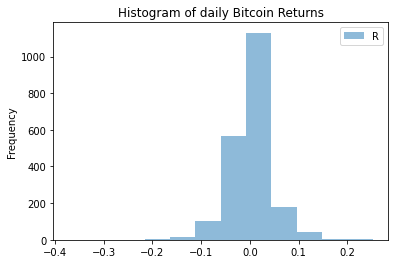

In [16]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

EXPLICATION:
THE BITCOIN IS PRESENTING MORE POSETIVE INCREMENATION ON HIS PRICES WHEN THE CHANGE IS SMALL ITS MORE PROBABLE TO HAVE A NEGATIVE CHANGE THAT A POSITIVE ONE.

In [13]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015556007569352544
The daily variance of Bitcoin is  0.0017372712473154484
The daily standard deviation (volatility) of Bitcoin return is  0.041680585976152595
The daily median return of Bitcoin is  0.0022173493980961467


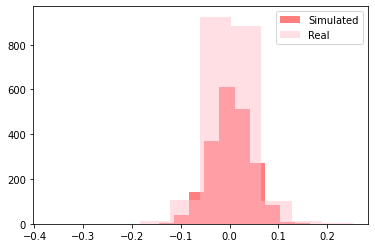

In [24]:
promedio=BTC["R"].mean()
Var=BTC["R"].var()
DVS=BTC["R"].std()
mediana=len(BTC.axes[0])


from matplotlib import pyplot
bins=10
simulacion=np.random.normal(loc=promedio, scale=DVS, size=mediana)
pyplot.hist(simulacion, bins, alpha=0.5, label="Simulated", color="red")
pyplot.hist(r_bitcoin.to_numpy(), bins, alpha=0.5, label="Real", color= "pink")
pyplot.legend(loc="upper right")
pyplot.show()

EXPLICATION:
THE DIFERENCE THAT I CAN NOTE IN SIMULATED VS REAL IS THAT IN THE REAL ONES THE DISTRIBUTION ARE MORE LOADED AT THE CENTER (BECAUSE IT´S NOT COMUNN THAT  THE BITCOIN PRICE CHANGE IN THOSE DAYS ) AND IN THE SILUTATED ARE MORE DRISTRIBUTED BY SCALE